In [1]:
# Data Manipulation Libraries
import numpy as np 
import pandas as pd 

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load tha data.
df = pd.read_csv(r"C:\Users\this pc\Downloads\archive (25)\Invistico_Airline.csv")
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


# preparation the train data

In [3]:
# Seeing the shape of the data.
df.shape

(129880, 22)

In [4]:
# Seeing if there are dublicated.
df.duplicated().sum()

0

In [5]:
# seeing if there are null values.
df.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [6]:
# Seeing information about data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [7]:
categorical_features = ['satisfaction', 'Customer Type', 'Type of Travel', 'Class', 'Seat comfort',
                       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
                       'Inflight wifi service', 'Inflight entertainment', 'Online support',
                       'Ease of Online booking', 'On-board service', 'Leg room service',
                       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

for i in categorical_features:
    print(df[i].value_counts())
    print('-' * 50)

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64
--------------------------------------------------
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
--------------------------------------------------
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
--------------------------------------------------
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64
--------------------------------------------------
3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: Seat comfort, dtype: int64
--------------------------------------------------
4    29593
5    26817
3    23184
2    22794
1    20828
0     6664
Name: Departure/Arrival time convenient, dtype: int64
--------------------------------------------------
3    28150
4    27216
2    27146
1    21076
5    20347
0     5945
Name: Food and drink, dtype: int64
------------------------------------------

In [8]:
# Define a mapping dictionary to combine the clusters
cluster_mapping = {
    'Seat comfort': {0: 1},
    'Departure/Arrival time convenient': {0: 1},
    'Food and drink': {0: 1},
    'Gate location': {0: 1},
    'Inflight wifi service': {0: 1},
    'Inflight entertainment': {0: 1},
    'Online support': {0: 1},
    'Ease of Online booking': {0: 1},
    'On-board service': {0: 1},
    'Leg room service': {0: 1},
    'Baggage handling': {0: 1},
    'Checkin service': {0: 1},
    'Cleanliness': {0: 1},
    'Online boarding': {0: 1}
}

# Update the specified columns with the new cluster labels using applymap
for col, mapping in cluster_mapping.items():
    df[col] = df[col].apply(lambda x: mapping.get(x, x))

In [9]:
# Check if the rating features have a rate from 1 to 5 was done correctly
for i in ['Gate location', 'Inflight wifi service', 'Online support', 'Ease of Online booking', 
          'On-board service', 'Leg room service', 'Checkin service', 'Cleanliness', 'Online boarding']:
    print(df[i].value_counts())
    print('-' * 50)

3    33546
4    30088
2    24518
1    22567
5    19161
Name: Gate location, dtype: int64
--------------------------------------------------
4    31560
5    28830
3    27602
2    27045
1    14843
Name: Inflight wifi service, dtype: int64
--------------------------------------------------
4    41510
5    35563
3    21609
2    17260
1    13938
Name: Online support, dtype: int64
--------------------------------------------------
4    39920
5    34137
3    22418
2    19951
1    13454
Name: Ease of Online booking, dtype: int64
--------------------------------------------------
4    40675
5    31724
3    27037
2    17174
1    13270
Name: On-board service, dtype: int64
--------------------------------------------------
4    39698
5    34385
3    22467
2    21745
1    11585
Name: Leg room service, dtype: int64
--------------------------------------------------
4    36481
3    35538
5    27005
2    15486
1    15370
Name: Checkin service, dtype: int64
---------------------------------------------

In [10]:
# Numerical columns
numerical_features = ["Age", "Flight Distance", "Departure Delay in Minutes", 'Arrival Delay in Minutes']

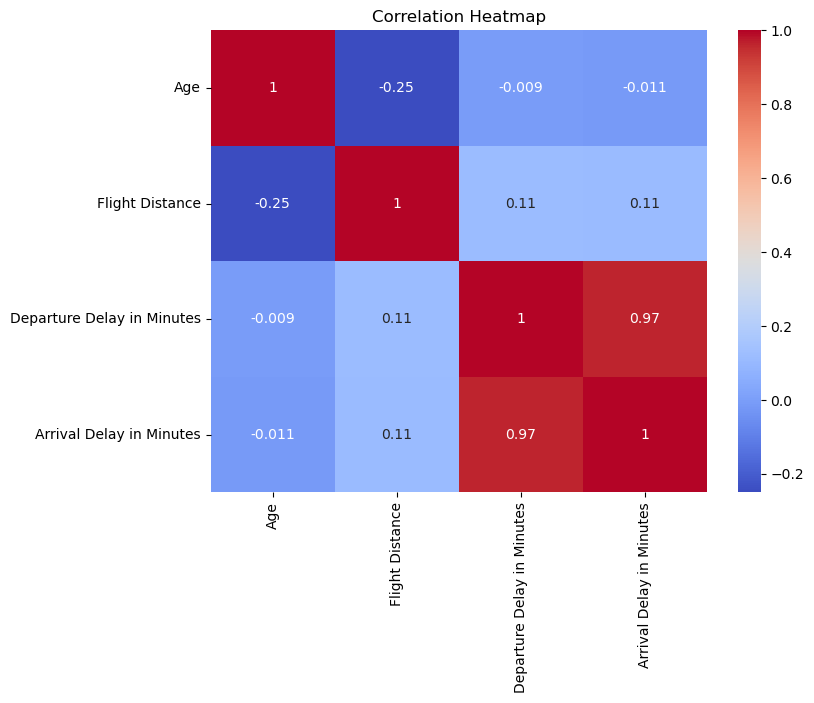

In [11]:
plt.figure(figsize=(8, 6))

# Calculate the correlation matrix for the numerical columns
correlation_matrix = df[numerical_features].corr()

# Create a heatmap using the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

It is evident that there is an extremely strong correlation of 0.97 between "Departure Delay in Minutes" and 'Arrival Delay in Minutes'. This high correlation suggests that these two variables essentially represent the same information, and therefore, it is advisable to eliminate one of them. Given that 'Arrival Delay in Minutes' also contains missing values, we have decided to proceed with the removal of this variable. This simplification will streamline our analysis while retaining the essential information.


In [12]:
# Drop the 'Arrival Delay in Minutes' column from the dataframe
df.drop('Arrival Delay in Minutes', axis=1, inplace=True)

# Data preprocessing

### Split the data

In [13]:
# Split data into x and y.
X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]


In [14]:
X.columns

Index(['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
       'Gate location', 'Inflight wifi service', 'Inflight entertainment',
       'Online support', 'Ease of Online booking', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Cleanliness', 'Online boarding', 'Departure Delay in Minutes'],
      dtype='object')

### Encoding and scalling the data

In [15]:
# One hot Endocing .
X = pd.get_dummies(X, columns=['Class'])

# Label Encoding.
label_encoder = LabelEncoder()
for i in ['Customer Type', 'Type of Travel']:
    X[i] = label_encoder.fit_transform(X[i])

In [16]:
# Select the features you want to scale
selected_features = X[["Age", "Flight Distance", "Departure Delay in Minutes"]]

# Create a scaler object.
scaler = StandardScaler()

# Fit scaler on the selected features.
scaler.fit(selected_features)

# Transform the selected features with the scaler.
selected_features_scaled = scaler.transform(selected_features)

# Replace the original columns with the scaled values in the DataFrame
X[["Age", "Flight Distance", "Departure Delay in Minutes"]] = selected_features_scaled

X.head()

,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,0,1.691351,1,-1.671103,1,1,1,2,2,4,...,3,1,3,5,3,2,-0.386481,0,1,0
1,0,0.500820,1,0.469852,1,1,1,3,1,2,...,4,4,4,2,3,2,7.756204,1,0,0
2,0,-1.615680,1,0.152458,1,1,1,3,2,1,...,3,3,4,4,4,2,-0.386481,0,1,0
3,0,1.360648,1,-1.322552,1,1,1,3,3,4,...,1,1,1,4,1,3,-0.386481,0,1,0
4,0,2.022054,1,-1.584452,1,1,1,3,4,3,...,2,1,2,4,2,5,-0.386481,0,1,0


# Modeling

In [17]:
# Define a list of models to evaluate
models = [LogisticRegression(max_iter=1000),DecisionTreeClassifier(),RandomForestClassifier()]

In [18]:

# Split train data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate over each model and evaluate its accuracy using cross-validation.
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Print the mean accuracy score for the current model
    print(f"{model.__class__.__name__}: Mean Accuracy = {scores.mean()}")

LogisticRegression: Mean Accuracy = 0.8340968352347101
DecisionTreeClassifier: Mean Accuracy = 0.9143825106955485
RandomForestClassifier: Mean Accuracy = 0.9416384265648745


After evaluating multiple classification models, we found that the Random Forest algorithm demonstrated the best performance based on the mean accuracy metric. Therefore, we selected the Random Forest model to make predictions on our test data.

In [19]:
# Make tha random forest model with specific best hyperparameters.
model = RandomForestClassifier()

# Fit the model.
model.fit(X_train, y_train)

# Predict y-predict.
y_pred = model.predict(X_test)

# Evaluate the accuracy of y-predict.
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.944


### Feature importances

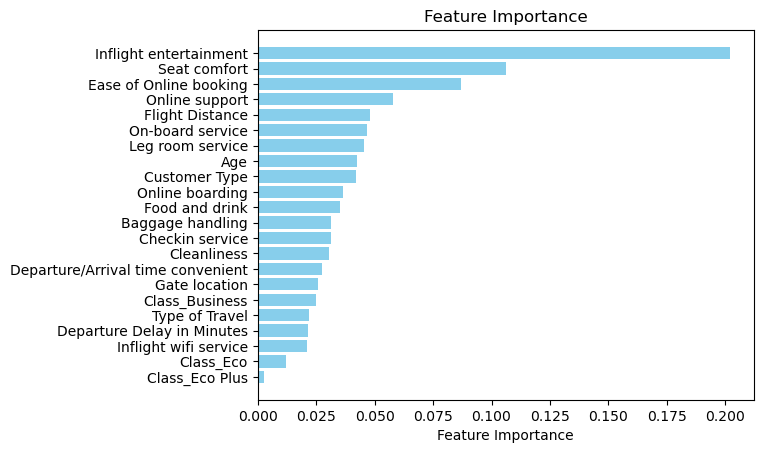

In [20]:
# Get feature importances
feature_importance = model.feature_importances_

# Sort feature importance indices
sorted_idx = np.argsort(feature_importance)

# Retrieve feature names
features = X.columns

# Plot feature importance
plt.figure()
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color='skyblue')
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()
